In [1]:
import pandas as pd
import seaborn as sns

from fairpair import *

## Group Representation

In [2]:
import multiprocessing
from workers import get_representation, get_accuracy

In [3]:
if __name__ == '__main__':
    pool = multiprocessing.Pool()
    contained = pool.map(get_representation, range(0,10))
    contained = [result for pool in contained for result in pool]
    contained = pd.DataFrame(contained, columns=['trial', 'iteration', 'representation', 'group'])
    contained

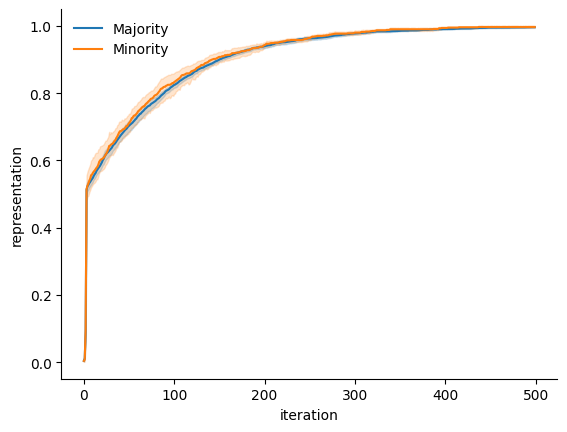

In [4]:
ax = sns.lineplot(contained, x='iteration', y='representation', hue='group', hue_order=['Majority', 'Minority'])
ax.legend(title=None, frameon=False)
sns.despine()

## Accuracy

In [15]:
if __name__ == '__main__':
    pool = multiprocessing.Pool()
    contained = pool.map(get_accuracy, range(0,10))
    contained = [result for pool in contained for result in pool]
    contained = pd.DataFrame(contained, columns=['trial', 'iteration', 'rank mean square error', 'group'])
    contained

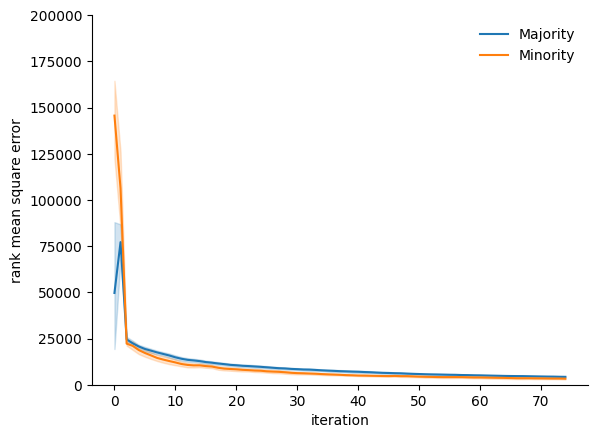

In [16]:
ax = sns.lineplot(contained, x='iteration', y='rank mean square error', hue='group', hue_order=['Majority', 'Minority'])
ax.legend(title=None, frameon=False)
ax.set(ylim=(0, 200000))
sns.despine()